In [1]:
# Example taken from ISL, James, Hastie

In [4]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)
 
%matplotlib inline
plt.style.use('seaborn-white')

In [6]:
from IPython.display import Image
Image(filename="/Users/jam3jam/Desktop/reg.png")
# Credits:  Python Machine Learning - Sebastian Raschka

In [5]:
advertising = pd.read_csv('/Users/colinjclemence/Documents/DSI_SM_01/curriculum/week-11/Regression_Recap/Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
advertising.head()

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

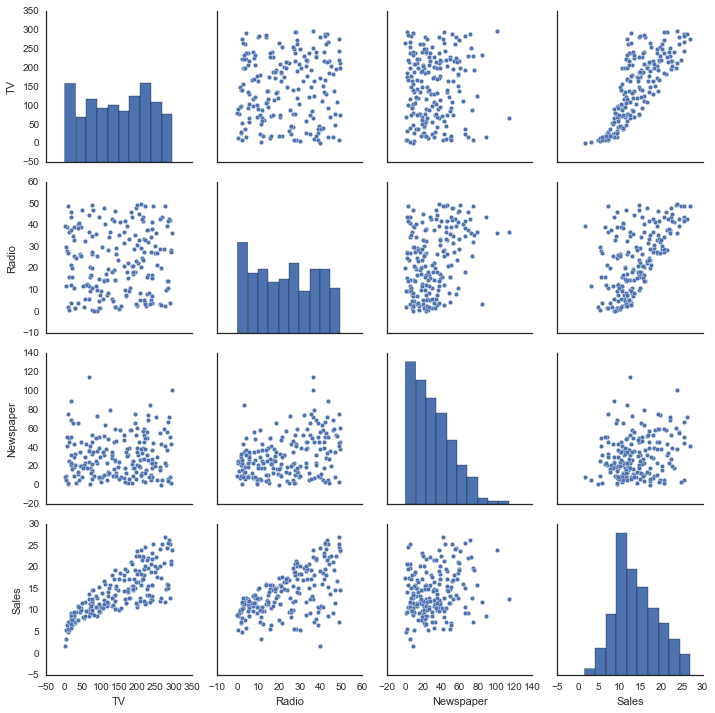

In [21]:
sns.pairplot(advertising)

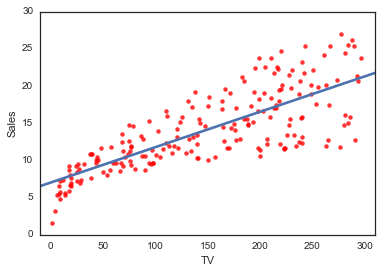

In [7]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310) 
plt.ylim(ymin=0);

In [22]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]
#There are many tables which you can select by changing the number 1 to another number, try 0 or 2
# or use .summary() alone to get all tables which you will see used a few cells below
smf

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,7.0326,0.458,15.360,0.000,6.130 7.935
TV,0.0475,0.003,17.668,0.000,0.042 0.053


We can conclude that in the absence of any advertising, sales will, on average, fall somewhere between 6,130 and 7,940 units.  <br><br>
Further, for each 1,000 dollars increase in television advertising, there will be an average increase in sales between 42 and 53 units.

In statistics, the residual sum of squares (RSS) is the sum of the squares of residuals (deviations predicted from actual empirical values of data). It is a measure of the discrepancy between the data and an estimation model. A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

In [23]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313506

In [24]:
regr = skl_lm.LinearRegression()

X = advertising.TV.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.03259354913
[ 0.04753664]


In [25]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.61187505085007099

In [26]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,9.3116,0.563,16.542,0.000,8.202 10.422
Radio,0.2025,0.020,9.921,0.000,0.162 0.243


In [27]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,12.3514,0.621,19.876,0.000,11.126 13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022 0.087


## Multiple Linear Regression

In [28]:
advertising.corr()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [41]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 15 Aug 2016   Prob (F-statistic):          6.68e-146
Time:                        12:34:54   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000         6.261     7.239
TV             0.0191      0.002     12.699      0.000         0.016     0.022
Radio          0.0289      0.009      3.241      0.001         0.011     0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000         0.001     0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].as_matrix()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 0.18799423  0.04575482]
2.92109991241


In [31]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

            Radio          TV
count  200.000000  200.000000
mean    23.264000  147.042500
std     14.846809   85.854236
min      0.000000    0.700000
25%      9.975000   74.375000
50%     22.900000  149.750000
75%     36.525000  218.825000
max     49.600000  296.400000

In [32]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

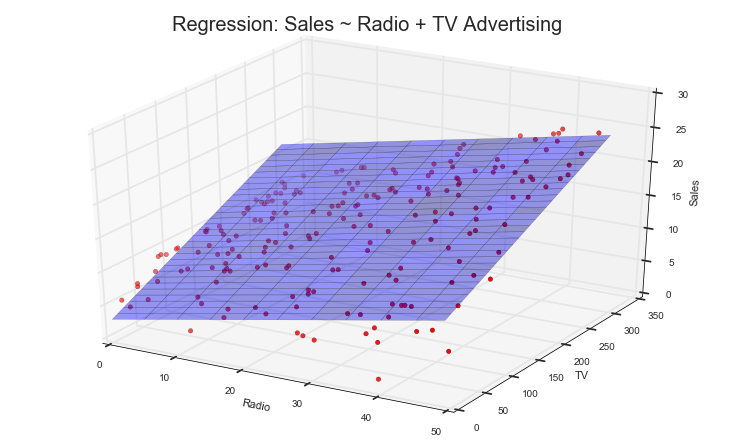

In [33]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

In [34]:
!pwd

/Users/colinjclemence/Documents/DSI_SM_01/curriculum/week-11/Regression_Recap
